### Import the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model, model_selection, metrics, tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Read the data into a variable

In [2]:
launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,2020-05-28,NaN,Cape Canaveral,NaN,NaN,87.0,71.0,79.36,NaN,...,20.0,10.0,NaN,NaN,NaN,30.08,NaN,13:45:00,Thunder,NaN
296,NaN,2020-05-29,NaN,Cape Canaveral,NaN,NaN,86.0,72.0,79.50,NaN,...,18.0,10.0,NaN,NaN,NaN,30.05,NaN,13:46:00,Fair,NaN
297,Space X Dragon,2020-05-30,20:22:00,Cape Canaveral,Crewed,Y,87.0,75.0,79.69,80.0,...,16.0,10.0,7.0,NaN,NaN,30.03,NaN,13:47:00,Fair,Rain before launch
298,NaN,2020-05-31,NaN,Cape Canaveral,NaN,NaN,87.0,72.0,79.70,NaN,...,13.0,10.0,NaN,NaN,NaN,30.01,NaN,13:47:00,Cloudy,NaN


### Data Cleaning

- First, get an overview of the data by following command, and it shows non-null value out of total value.
- So, will get an idea about the missing values.

In [3]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

### Handeling the missing values

- The rows that don't have Y in the Launched column didn't have a rocket launch, so make those missing values N.
- For rows missing information on whether the rocket was crewed or uncrewed, assume uncrewed. Uncrewed is more likely because there were fewer crewed missions.
- For missing wind direction, mark it as unknown.
- For missing condition data, assume it was a typical day and use fair.
- For any other data, use a value of 0.

In [4]:
launch_data['Launched?'].fillna('N',inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
launch_data['Wind Direction'].fillna('unknown',inplace=True)
launch_data['Condition'].fillna('Fair',inplace=True)
launch_data.fillna(0,inplace=True)
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


### Data manipulation

- Because computations are best suited for numerical inputs, convert all text into numbers.

In [5]:
label_encoder = preprocessing.LabelEncoder()

launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [6]:
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0


- First, save the output(y) we are interested in. In this case, "launch" yes and no's go into the output variable.
- Removing the columns we are not interested in.
- Saving the rest of the data as input data(x).

In [7]:
y = launch_data['Launched?']

launch_data.drop(['Name','Date','Time (East Coast)','Location','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed', 'Launched?'], axis=1,inplace=True)

x= launch_data

- Using the Heatmap, we can see how data are correlated to eachother.
- The value usually ranges from +1 to -1. The +1 show's the positive correlation and the -1 show's the negative correlation. Value 0 show's there isn't any correlation available.
- Here, from figure, we can see that, Dark colour box show's the positive correlation and light colour box show's the negative correlation. The boxes are also annoted with its correlation value's.

<AxesSubplot:>

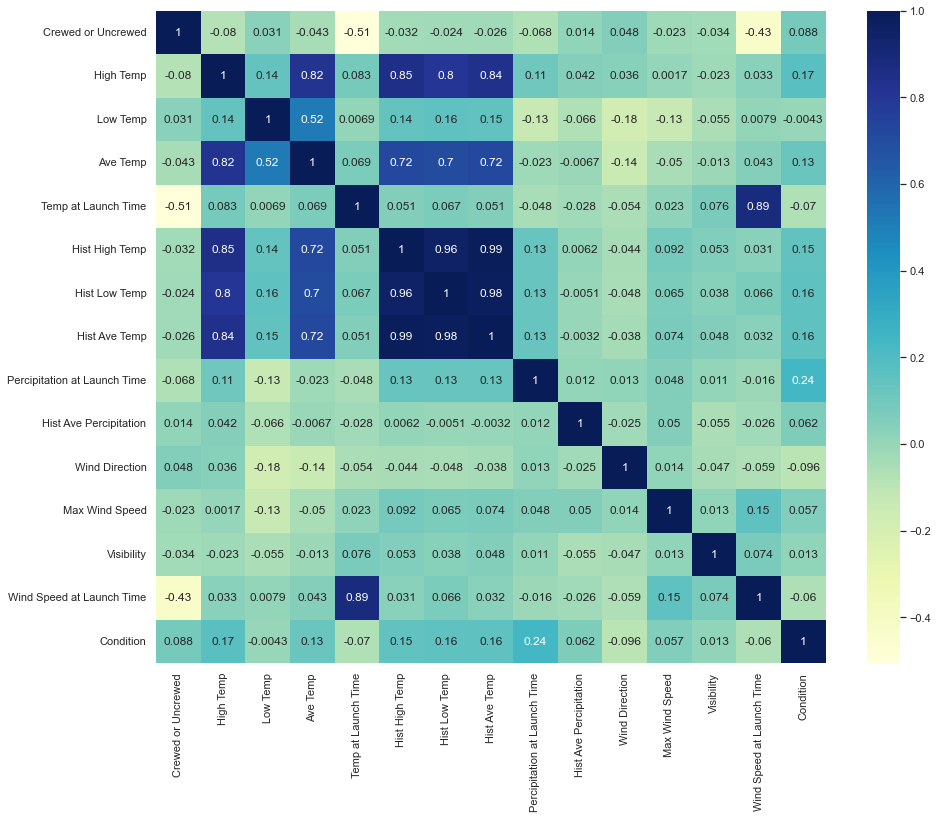

In [8]:
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(launch_data.corr(), annot=True, cmap='YlGnBu') 

### Split data into training and testing datasets

- Input data: X - All of the columns that we want to use to predict a launch.
- Output data: y - The outcome of each row (whether a rocket launched or not).
- Test size: 0.2 - Training on 80% of your data and testing on 20% is a common split in data science.
- Random state: 99 - A random seed that will change the randomness of selecting the data.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=99)

### Build, Train and test the machine learning model to predict rocket launch success

In [10]:
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)

tree_model.fit(x_train,y_train)
y_pred = tree_model.predict(x_test)
print(y_pred)

['N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'Y']


In [11]:
tree_model.score(x_test,y_test)

0.9833333333333333

### Confusion matrix

- By seeing the confusion matrix, we get an idea about the erroe or accuracy.
- Confusion matricx is the comparison of the Predicted values Vs. the Actual values.
- True Positive(49): Actual value is true and predictes value is also true.
- False Negative(0): Actual value is false but predicted as a true.
- False Positive(1): Actual value is False but predicted as a true.
- True Negative(10): Actual value is Negative and predicted also as negative.

Text(39.5, 0.5, 'Actual Values')

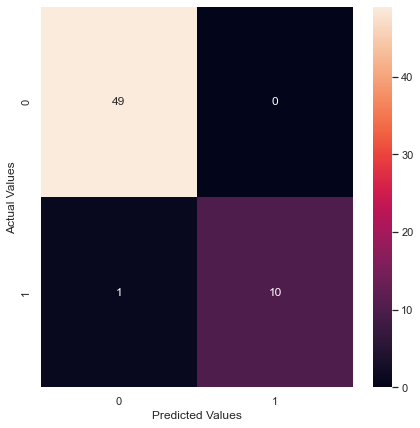

In [12]:
sns.set(rc = {'figure.figsize':(7,7)})
p = sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
p.set_xlabel('Predicted Values')
p.set_ylabel('Actual Values')

In [13]:
result_df = pd.DataFrame({'Model': ['Dicision Tree'], 'Accuracy': 0.98})
result_df

,Model,Accuracy
0,Dicision Tree,0.98
